In [84]:
import numpy as np
import matplotlib.pyplot as plt
import collections
import pickle
from Levenshtein import distance as levenshtein_distance
import copy
import os
from tqdm import tqdm

In [85]:
# load MAL scraps. A dictionary from anime_id to tuple of
#    - anime name
#    - list of tuples (character_name, character_id)

def load_malscraps(target):
    loaded = {}
    dropped = []
    for item in os.listdir(target):
        print(item)
        dump = pickle.load(open(f"{target}/{item}", "rb"))
        for ent in dump[0].items():
            loaded[ent[0]] = ent[1]
        dropped += dump[1]
    print(f"loaded {len(loaded.items())} items in total.")
    return loaded
        
malscrap = load_malscraps("MALscrap/")

maldump_10000_20000.p
MALSCmaldump_20000_30000.p
maldump_30000_40000.p
MALSCmaldump_30000_35000.p
maldump_0_10000.p
loaded 13380 items in total.


In [86]:
# load danbooru bindings - dictionary from anime name to list of characters.

def load_boorucharmap():
    character2anime = collections.defaultdict(lambda: [])
    bindings = collections.defaultdict(lambda: 0)
    for animename in os.listdir("animedump"):
        for character in os.listdir(f"animedump/{animename}"):
            if character in character2anime.keys():
                bindings[(animename, character2anime[character])] += 1
            else:
                character2anime[character[:-4]].append(animename)

    print(f"loaded {len(character2anime.keys())} bindings.")
    return character2anime

character2anime = load_boorucharmap()
    

loaded 29951 bindings.


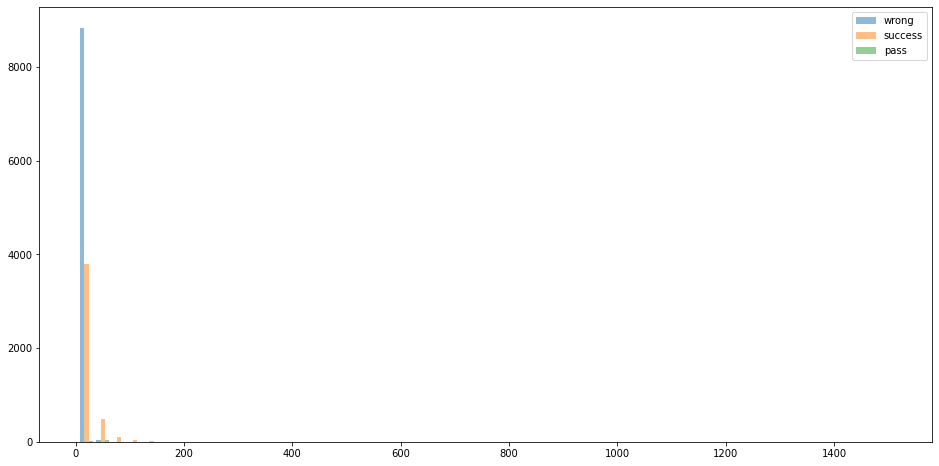

4432 8886 62


In [87]:
# try to create a dictionary binding MAL animeid to danbooru anime name. Verify against death_note that seems
# to be a common missclasify

def fetch_bindings(target, malscrap, character2anime):
    animename, characters = malscrap[target]
    
    bindcount = collections.defaultdict(lambda: 0)
    usfcnt = 0
    for charactername, _ in characters:
        fetch = charactername.lower()
        candidates = copy.deepcopy(character2anime[fetch])
        if "_" in fetch and len(fetch.split("_")) == 2:
            t = fetch.split("_")
            nf = t[1] + "_" + t[0]
            candidates += character2anime[nf]
        if len(candidates) > 0:
            usfcnt += 1
        for c in candidates:
            bindcount[c] += 1
            
    if len(characters) < 2:
        raise NotImplemented
    mb = max(t[1] for t in bindcount.items())
    sl = list(sorted([(t[1], t[0]) for t in bindcount.items()], reverse=True))
    anm = animename.replace("- MyAnimeList.net", "").lower().replace(" ", "_")
    for e in sl:
        if e[1] in anm or anm in e[1]:
            return (True, len(characters), e)
        
    if sl[0][0] < usfcnt*0.20:
        return (False, len(characters))
    return (True, len(characters), sl[0])

a = fetch_bindings(5351, malscrap, character2anime)

ksamplesizes = []
wsamplesizes = []
misss = []
animedictionary = {}
for animeit in malscrap.keys():
    try:
        a = fetch_bindings(animeit, malscrap, character2anime)
        if a[0] == True:
            animedictionary[animeit] = (a[2][1], a[1])
            if a[2][1] == 'death_note':
                wsamplesizes.append(a[1])
            else:
                ksamplesizes.append(a[1])
        else:
            misss.append(a[1])
    except Exception as e:
        print(e)
        pass
    
ss = np.array(ksamplesizes)
sw = np.array(wsamplesizes)
sm = np.array(misss)
fig = plt.figure(figsize=(16,8))
plt.hist([sw, ss, sm], 50, alpha=0.5, label = ['wrong', 'success', 'pass'])
plt.legend(loc='upper right')
plt.show()
print(len(ss), len(sw), len(sm))

In [88]:
animedictionary[15]
maxconf = max(a[1][1] for a in animedictionary.items())
print(maxconf)
with open("conversion_dictionary.csv", "w") as f:
    f.write("MALid, booru_name, confidence\n")
    for malid, boorudata in animedictionary.items():
        f.write(f"{malid}, {boorudata[0]}, {boorudata[1]/maxconf}\n")

1509


In [89]:
for w in sorted([(a[1][1], a) for a in animedictionary.items()], reverse=True):
    print(w)

(1509, (235, ('meitantei_conan', 1509)))
(909, (21, ('one_piece', 909)))
(456, (1960, ('anpanman', 456)))
(413, (1735, ('naruto', 413)))
(397, (2076, ('kindaichi_shounen_no_jikenbo', 397)))
(354, (5231, ('inazuma_eleven_(series)', 354)))
(306, (1425, ('lupin_iii', 306)))
(279, (269, ('bleach', 279)))
(271, (820, ('ginga_eiyuu_densetsu', 271)))
(250, (1199, ('rakudai_ninja_rantarou', 250)))
(226, (918, ('gintama', 226)))
(218, (30694, ('dragon_ball', 218)))
(214, (6702, ('fairy_tail', 214)))
(214, (1564, ('pokemon', 214)))
(196, (9863, ('sket_dance', 196)))
(170, (22043, ('fairy_tail', 170)))
(167, (34566, ('naruto', 167)))
(151, (37140, ('gegege_no_kitarou', 151)))
(148, (223, ('dragon_ball', 148)))
(146, (813, ('dragon_ball', 146)))
(140, (1470, ('city_hunter', 140)))
(135, (35972, ('fairy_tail', 135)))
(132, (527, ('pokemon', 132)))
(126, (19, ('monster_(manga)', 126)))
(122, (38408, ('boku_no_hero_academia', 122)))
(117, (10033, ('toriko_(series)', 117)))
(117, (1604, ('katekyo_hitm

(10, (20175, ('death_note', 10)))
(10, (20147, ('death_note', 10)))
(10, (20117, ('death_note', 10)))
(10, (20075, ('death_note', 10)))
(10, (9846, ('death_note', 10)))
(10, (9741, ('nana_to_kaoru', 10)))
(10, (9731, ('nurarihyon_no_mago', 10)))
(10, (9630, ('sengoku_basara', 10)))
(10, (9598, ('death_note', 10)))
(10, (9591, ('code_geass', 10)))
(10, (9544, ('death_note', 10)))
(10, (9498, ('death_note', 10)))
(10, (9491, ('death_note', 10)))
(10, (9435, ('death_note', 10)))
(10, (9325, ('death_note', 10)))
(10, (9312, ('death_note', 10)))
(10, (9311, ('death_note', 10)))
(10, (9308, ('death_note', 10)))
(10, (9220, ('seikimatsu_occult_gakuin', 10)))
(10, (9213, ('kowarekake_no_orgel', 10)))
(10, (9204, ('death_note', 10)))
(10, (9127, ('zettai_karen_children', 10)))
(10, (9063, ('to_aru_majutsu_no_index', 10)))
(10, (9035, ('lupin_iii', 10)))
(10, (9006, ('death_note', 10)))
(10, (8949, ('death_note', 10)))
(10, (8577, ('death_note', 10)))
(10, (8496, ('makai_senki_disgaea_2', 10)))


(5, (34037, ('death_note', 5)))
(5, (34030, ('death_note', 5)))
(5, (34016, ('death_note', 5)))
(5, (34015, ('death_note', 5)))
(5, (34008, ('death_note', 5)))
(5, (34005, ('death_note', 5)))
(5, (34003, ('death_note', 5)))
(5, (34000, ('death_note', 5)))
(5, (33999, ('death_note', 5)))
(5, (33998, ('death_note', 5)))
(5, (33994, ('death_note', 5)))
(5, (33986, ('death_note', 5)))
(5, (33982, ('death_note', 5)))
(5, (33980, ('death_note', 5)))
(5, (33978, ('death_note', 5)))
(5, (33972, ('death_note', 5)))
(5, (33960, ('death_note', 5)))
(5, (33958, ('death_note', 5)))
(5, (33946, ('death_note', 5)))
(5, (33945, ('death_note', 5)))
(5, (33941, ('death_note', 5)))
(5, (33940, ('death_note', 5)))
(5, (33939, ('death_note', 5)))
(5, (33938, ('death_note', 5)))
(5, (33937, ('death_note', 5)))
(5, (33936, ('death_note', 5)))
(5, (33927, ('death_note', 5)))
(5, (33922, ('death_note', 5)))
(5, (33916, ('death_note', 5)))
(5, (33913, ('death_note', 5)))
(5, (33910, ('death_note', 5)))
(5, (339